In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
EDF_APP_OUTPUT_FILE = "/home/muuurk/Projects/RT_computation_node/python_app_edf.txt"
DEFAULT_SCHED_APP_OUTPUT_FILE = "/home/muuurk/Projects/RT_computation_node/python_app_default_scheduler.txt"

In [3]:
df1 = pd.read_csv(EDF_APP_OUTPUT_FILE, sep=" ", header=None, names=["App finish times"])
df2 = pd.read_csv(DEFAULT_SCHED_APP_OUTPUT_FILE, sep=" ", header=None, names=["App finish times"])

finish_times = pd.concat([df1, df2], axis=1)
finish_times = finish_times.set_axis(['Finish times w/ EDF', 'Finish times w/- EDF'], axis=1, inplace=False)


df1['Scheduler'] = "EDF"
df2['Scheduler'] = "DEFAULT"
finish_times_sns = pd.concat([df1, df2])

print(finish_times)
print(finish_times_sns)

    Finish times w/ EDF  Finish times w/- EDF
0             500151457             500658904
1             500070538             500580162
2             500034226             500790752
3             500068408             501375492
4             500150492             500550118
..                  ...                   ...
95            500082558             500648324
96            500072812             500621555
97            500078844             500623135
98            500203605             500584944
99            500070325             500607489

[100 rows x 2 columns]
    App finish times Scheduler
0          500151457       EDF
1          500070538       EDF
2          500034226       EDF
3          500068408       EDF
4          500150492       EDF
..               ...       ...
95         500648324   DEFAULT
96         500621555   DEFAULT
97         500623135   DEFAULT
98         500584944   DEFAULT
99         500607489   DEFAULT

[200 rows x 2 columns]


In [4]:
edf_std = finish_times["Finish times w/ EDF"].std()
non_edf_std = finish_times["Finish times w/- EDF"].std()

edf_med = finish_times["Finish times w/ EDF"].median()
non_edf_med = finish_times["Finish times w/- EDF"].median()

edf_max = finish_times["Finish times w/ EDF"].max()
non_edf_max = finish_times["Finish times w/- EDF"].max()

edf_perc = finish_times["Finish times w/ EDF"].quantile(0.9)
non_edf_perc = finish_times["Finish times w/- EDF"].quantile(0.9)

print("\t\tEDF\t\t\tDefault")
print("Standard Dev.\t{}\t{}".format(edf_std, non_edf_std))
print("Median\t\t{}\t\t{}".format(edf_med, non_edf_med))
print("90% Percentile\t{}\t\t{}".format(edf_perc, non_edf_perc))
print("Max\t\t{}\t\t{}".format(edf_max, non_edf_max))

		EDF			Default
Standard Dev.	70893.98655275226	461567.7570168389
Median		500108598.0		500600205.5
90% Percentile	500163505.2		500699137.8
Max		500467821		504866386


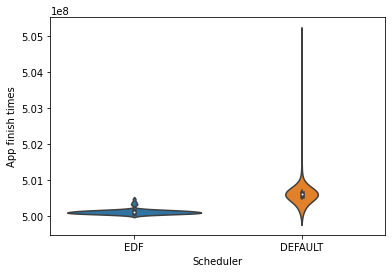

In [5]:
sns.violinplot( y=finish_times_sns["App finish times"], x=finish_times_sns["Scheduler"]);
plt.show()

In [11]:
pd.options.plotting.backend = "plotly"
np.random.seed(1)

fig = finish_times.plot.box()
fig.show()